## Comparing Strain Sensor ADC to Autobender/Rotary Encoder

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from config import path_to_repository
from analysis import DLC3DBendAngles
from analysis import bender_class
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:2808: SyntaxWarning: invalid escape sequence '\D'
  ax[0].set_ylabel('$\Delta R/R_o$')
C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:2815: SyntaxWarning: invalid escape sequence '\D'
  ax[1].set_ylabel('$\Delta R/R_o$')
C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:3104: SyntaxWarning: invalid escape sequence '\D'
  ax1.set_ylabel('$\Delta R/R_o$', color='b')
C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:3119: SyntaxWarning: invalid escape sequence '\e'
  ax2.set_xlabel('$\epsilon$ (strain)')


In [4]:
renc = os.path.join(path_to_repository , "CSV Data/9_9_25/2025_09_09_11_48_41_C/data_rotenc_2025_09_09_11_48_41.csv")
strain = os.path.join(path_to_repository , "CSV Data/9_9_25/2025_09_09_11_48_41_C/data_adc_2025_09_09_11_48_41.csv")

# reapplied sensor
renc_r1 = os.path.join(path_to_repository , "CSV Data/9_9_25/2025_09_09_14_23_24_C/data_rotenc_2025_09_09_14_23_24.csv")
strain_r1 = os.path.join(path_to_repository , "CSV Data/9_9_25/2025_09_09_14_23_24_C/data_adc_2025_09_09_14_23_24.csv")

h_renc = os.path.join(path_to_repository , "CSV Data/9_9_25/2025_09_09_12_18_44_H/data_rotenc_2025_09_09_12_18_44.csv")
h_strain = os.path.join(path_to_repository , "CSV Data/9_9_25/2025_09_09_12_18_44_H/data_adc_2025_09_09_12_18_44.csv")

# reapplied sensor
h_renc_r1 = os.path.join(path_to_repository , "CSV Data/9_9_25/2025_09_09_14_13_02_H/data_rotenc_2025_09_09_14_13_02.csv")
h_strain_r1 = os.path.join(path_to_repository , "CSV Data/9_9_25/2025_09_09_14_13_02_H/data_adc_2025_09_09_14_13_02.csv")

# --- load CSVs ---
strain_df = pd.read_csv(strain)
renc_df   = pd.read_csv(renc)

strain_df_r1 = pd.read_csv(strain_r1)
renc_df_r1   = pd.read_csv(renc_r1)

h_strain_df = pd.read_csv(h_strain)
h_renc_df   = pd.read_csv(h_renc)

h_strain_df_r1 = pd.read_csv(h_strain_r1)
h_renc_df_r1   = pd.read_csv(h_renc_r1)


In [5]:
cam = DLC3DBendAngles(strain_df)
h_cam = DLC3DBendAngles(h_strain_df)
cam_r1 = DLC3DBendAngles(strain_df_r1)
h_cam_r1 = DLC3DBendAngles(h_strain_df_r1)

In [6]:
# list of datasets: (label, cam_obj, strain_df, renc_df)
pairs = [
    ("autobender", cam, strain_df, renc_df),
    ("hand",       h_cam, h_strain_df, h_renc_df),
    ("autobender reapply", cam_r1, strain_df_r1, renc_df_r1,), 
    ("hand reapply",       h_cam_r1, h_strain_df_r1, h_renc_df_r1),
    # add more if needed...
]

merged_results = {}

for label, cam_obj, s_df, e_df in pairs:
    print(f"\n=== {label}: match & merge ===")

    # --- build match map ---
    cam_obj.find_matching_indices(
        encoder_df=e_df,
        cam_time_col="timestamp",
        enc_time_col="timestamp",
        tolerance="10ms",
        direction="nearest",
    )

    # --- attach encoder cols ---
    merged_df = cam_obj.attach_encoder_using_match(
        encoder_df=e_df,
        columns=None,
        suffix="_renc",
        keep_time_delta=True,
        drop_unmatched=True,
    )

    print(f"{label}: aligned rows = {len(merged_df)}")
    print(merged_df.filter(regex="timestamp|angle|strain|time_delta", axis=1).head())

    # store in dict for later use
    merged_results[label] = merged_df



=== autobender: match & merge ===
[find_matching_indices] Dropping 0 camera rows with NaT timestamps.
[find_matching_indices] Dropping 0 encoder rows with NaT timestamps.
[debug] cam range: 0 days 11:48:43.652923 → 0 days 11:48:53.651709
[debug] enc range: 0 days 11:48:43.666324 → 0 days 11:48:53.643426
[debug] probe |delta| (ms) stats: count    21.000000
mean      6.750333
std       3.395231
min       0.376000
25%       4.194000
50%       7.479000
75%       9.427000
max      13.401000
Name: delta_ms, dtype: float64
autobender: aligned rows = 6505
      timestamp  timestamp_renc  angle_renc  time_delta_renc
5  114843674580    114843666324   -2.455342           -8.256
6  114843674580    114843666324   -2.455342           -8.256
7  114843674580    114843666324   -2.455342           -8.256
8  114843674580    114843666324   -2.455342           -8.256
9  114843674580    114843666324   -2.455342           -8.256

=== hand: match & merge ===


C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:443: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  cam_small["_t_cam_ns"] = cam_small["t_cam_td"].view("i8")
C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:444: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  enc_small["_t_enc_ns"] = enc_small["t_enc_td"].view("i8")


[find_matching_indices] Dropping 0 camera rows with NaT timestamps.
[find_matching_indices] Dropping 0 encoder rows with NaT timestamps.
[debug] cam range: 0 days 12:18:46.342516 → 0 days 12:19:16.335135
[debug] enc range: 0 days 12:18:46.348692 → 0 days 12:19:08.503619
[debug] probe |delta| (ms) stats: count      21.000000
mean     1171.304286
std      2348.591779
min         2.256000
25%         6.597000
50%         7.642000
75%       344.291000
max      7824.069000
Name: delta_ms, dtype: float64
hand: aligned rows = 14270
      timestamp  timestamp_renc  angle_renc  time_delta_renc
0  121846342516    121846348692   -3.390454            6.176
1  121846342516    121846348692   -3.390454            6.176
2  121846342516    121846348692   -3.390454            6.176
3  121846342516    121846348692   -3.390454            6.176
4  121846342516    121846348692   -3.390454            6.176

=== autobender reapply: match & merge ===


C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:443: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  cam_small["_t_cam_ns"] = cam_small["t_cam_td"].view("i8")
C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:444: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  enc_small["_t_enc_ns"] = enc_small["t_enc_td"].view("i8")


[find_matching_indices] Dropping 0 camera rows with NaT timestamps.
[find_matching_indices] Dropping 0 encoder rows with NaT timestamps.
[debug] cam range: 0 days 14:23:26.462710 → 0 days 14:23:36.459182
[debug] enc range: 0 days 14:23:26.472196 → 0 days 14:23:36.447679
[debug] probe |delta| (ms) stats: count    21.000000
mean      4.684762
std       2.252125
min       0.346000
25%       3.339000
50%       4.678000
75%       5.439000
max       9.486000
Name: delta_ms, dtype: float64
autobender reapply: aligned rows = 6380
      timestamp  timestamp_renc  angle_renc  time_delta_renc
0  142326462710    142326472196 -133.140161            9.486
1  142326462710    142326472196 -133.140161            9.486
2  142326462710    142326472196 -133.140161            9.486
3  142326462710    142326472196 -133.140161            9.486
4  142326462710    142326472196 -133.140161            9.486

=== hand reapply: match & merge ===


C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:443: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  cam_small["_t_cam_ns"] = cam_small["t_cam_td"].view("i8")
C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:444: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  enc_small["_t_enc_ns"] = enc_small["t_enc_td"].view("i8")


[find_matching_indices] Dropping 0 camera rows with NaT timestamps.
[find_matching_indices] Dropping 0 encoder rows with NaT timestamps.
[debug] cam range: 0 days 14:13:03.945403 → 0 days 14:13:33.938389
[debug] enc range: 0 days 14:13:03.952145 → 0 days 14:13:26.311181
[debug] probe |delta| (ms) stats: count      21.000000
mean     1112.024810
std      2272.864694
min         2.346000
25%         6.396000
50%         8.131000
75%       133.644000
max      7620.102000
Name: delta_ms, dtype: float64
hand reapply: aligned rows = 14245
      timestamp  timestamp_renc  angle_renc  time_delta_renc
0  141303945403    141303952145 -132.805368            6.742
1  141303945403    141303952145 -132.805368            6.742
2  141303945403    141303952145 -132.805368            6.742
3  141303945403    141303952145 -132.805368            6.742
4  141303945403    141303952145 -132.805368            6.742


C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:443: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  cam_small["_t_cam_ns"] = cam_small["t_cam_td"].view("i8")
C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:444: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  enc_small["_t_enc_ns"] = enc_small["t_enc_td"].view("i8")


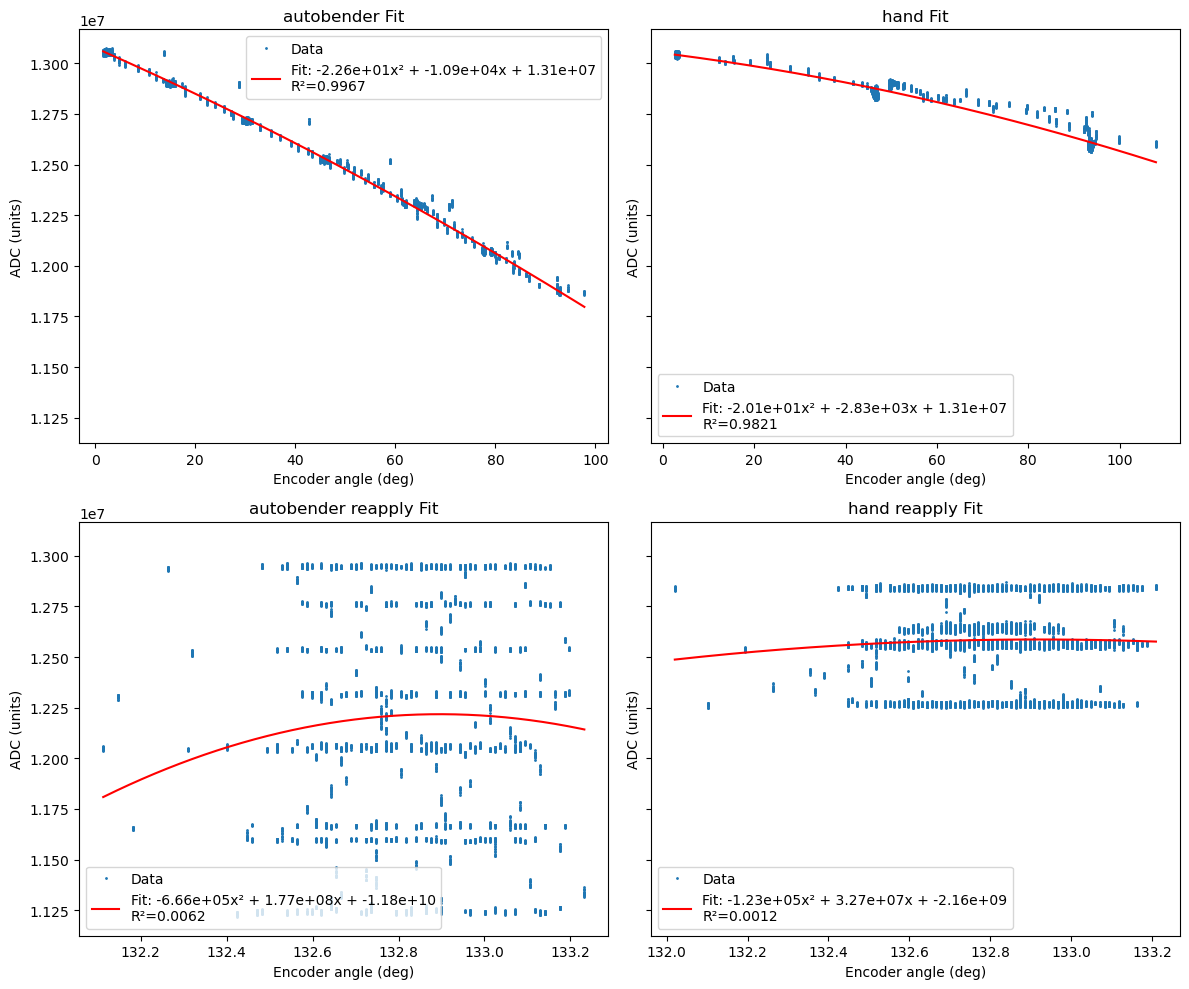

In [7]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd

def _ensure_series(col):
    """Collapse duplicate-name DataFrame to a single Series."""
    if isinstance(col, pd.DataFrame):
        for j in range(col.shape[1]):
            s = col.iloc[:, j]
            if not s.isna().all():
                return s
        return col.iloc[:, 0]
    return col

def quad_model(x, a, b, c):
    return a*x**2 + b*x + c

def fit_and_plot(ax, df, title):
    # --- force these names ---
    enc_col = "angle_renc"
    adc_col = "adc_ch3"

    if enc_col not in df.columns or adc_col not in df.columns:
        ax.set_title(f"{title}\n(Missing {enc_col} or {adc_col})")
        ax.axis("off")
        return

    x_raw = _ensure_series(df[enc_col])
    y_raw = _ensure_series(df[adc_col])

    x = pd.to_numeric(-x_raw, errors="coerce")  # negate if you want angle sign flipped
    y = pd.to_numeric(y_raw, errors="coerce")
    mask = x.notna() & y.notna()
    x = x[mask].to_numpy()
    y = y[mask].to_numpy()

    if x.size < 5:
        ax.set_title(f"{title}\n(Not enough points)")
        return

    # Fit quadratic
    params, _ = curve_fit(quad_model, x, y)
    a, b, c = params

    # Predictions & R²
    y_pred = quad_model(x, a, b, c)
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r2 = 1 - (ss_res / ss_tot)

    # Smooth fit
    x_fit = np.linspace(x.min(), x.max(), 500)
    y_fit = quad_model(x_fit, a, b, c)

    # Plot
    ax.plot(x, y, ".", markersize=2, label="Data")
    ax.plot(x_fit, y_fit, "r-", 
            label=f"Fit: {a:.2e}x² + {b:.2e}x + {c:.2e}\nR²={r2:.4f}")
    ax.set_xlabel("Encoder angle (deg)")
    ax.set_ylabel("ADC (units)")
    ax.set_title(title)
    ax.legend()

# -----------------------------------
# Loop over merged_results and plot
# -----------------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

for ax, (label, df) in zip(axes.flat, merged_results.items()):
    fit_and_plot(ax, df, f"{label} Fit")

plt.tight_layout()
plt.show()


In [8]:
# sensor on autobender

g = bender_class()

# direct from aligned DataFrame
g.load_merged_df(merged_df, enc_col="angle_renc", adc_col="adc_ch3")

# Sensor on hand on autobender

h = bender_class()

# direct from aligned DataFrame
h.load_merged_df(h_merged_df, enc_col="angle_renc", adc_col="adc_ch3")




Loaded merged_df with 14245 rows into bender_class.


NameError: name 'h_merged_df' is not defined

In [ ]:
# sensor on autobnder
g.normalize_adc_bw_01()
g.plot_data(scatter=True, title="Encoder vs ADC (aligned)")

#sensor on hand on autobender

# now reuse existing methods
h.normalize_adc_bw_01()
h.plot_data(scatter=True, title="Encoder vs ADC (aligned)")



In [ ]:
import re
import numpy as np
from sklearn.model_selection import train_test_split

# --- helpers to find your columns (works with 'angle_renc' or 'angle_renc_renc', etc.) ---
def pick_angle_col(df):
    cols = df.columns
    renc_candidates = [c for c in cols if re.search(r'angle.*_renc$', c)]
    if renc_candidates:
        return renc_candidates[0]
    for cand in ("angle_renc", "angle", "enc_angle"):
        if cand in cols: return cand
    raise KeyError(f"No encoder angle column found in: {list(cols)}")

def pick_adc_col(df):
    for cand in ("adc_ch3","adc_ch2","adc_ch1","adc_ch0","adc","ADC Value"):
        if cand in df.columns: return cand
    m = [c for c in df.columns if re.match(r'adc_ch\d+', c)]
    if m: return m[0]
    raise KeyError(f"No ADC column found in: {list(df.columns)}")

# --- adapter: build a bender_class from an already-normalized DataFrame ---
def bender_from_normalized_df(df,
                              enc_col=None,
                              adc_col=None,
                              invert_angle=False,
                              normalize_label="pre-normalized"):
    enc_col = enc_col or pick_angle_col(df)
    adc_col = adc_col or pick_adc_col(df)

    # Build the 2 columns bender_class expects
    enc = np.asarray(df[enc_col], dtype=float)
    if invert_angle:
        enc = -enc
    adc = np.asarray(df[adc_col], dtype=float)

    # Create instance and inject data directly
    m = bender_class()
    m.data = pd.DataFrame({
        "Rotary Encoder": enc,    # degrees
        "ADC Value":      adc     # already normalized to your liking
    })
    m.columns = m.data.columns
    m.adc_normalized = True              # <- critical
    m.normalize_type = normalize_label   # purely for axis label/legend
    return m

# ---------------------------------------
# YOUR EXISTING STRUCTURE (no load/normalize)
# ---------------------------------------
# Inputs:
DS_all = [[merged_df], [h_merged_df]]
bar_labels = ["auto cal", "hand cal"]
degree = 15 

# Flatten datasets + labels
DS_flat = []; xlabel_flat = []
for ds_group, ds_lab in zip(DS_all, bar_labels):
    xlabel_flat.extend([ds_lab]*len(ds_group))
    DS_flat.extend(ds_group)

pairwise_min_accuracy = np.full((len(DS_flat), len(DS_flat)), np.nan)
pairwise_abs_error    = np.full((len(DS_flat), len(DS_flat)), np.nan)

for i, train_df in enumerate(DS_flat):
    train_name = f"DS{i+1}"

    # Build model directly from the pre-normalized DataFrame
    g = bender_from_normalized_df(train_df, normalize_label="pre-normalized (user)")
    # High-capacity fit on ~all train data (same as your old perc_train=0.99, niter=1)
    g.train_model_test_accuracy(perc_train=0.99, niter=1, degree=degree)

    for j, test_df in enumerate(DS_flat):
        if i == j:
            # Diagonal: within-sample CV with separate instance
            g2 = bender_from_normalized_df(train_df, normalize_label="pre-normalized (user)")
            # Your original used degree=2 here; keep that if intended:
            g2.train_model_test_accuracy(perc_train=0.8, niter=10, degree=2)

            min_angle_100, all_min_angle_100 = g.get_min_accuracy_100()
            if all_min_angle_100:
                pairwise_min_accuracy[i, j] = float(np.mean(np.array(all_min_angle_100)))
            if hasattr(g2, "abs_angular_error") and len(g2.abs_angular_error):
                pairwise_abs_error[i, j] = float(np.mean(np.hstack(g2.abs_angular_error)))
        else:
            # Off-diagonal: predict on held-out slices from the OTHER dataset
            g_test = bender_from_normalized_df(test_df, normalize_label="pre-normalized (user)")
            df_test = g_test.data

            acc_runs, err_runs = [], []
            for seed in range(10):
                _, df_te = train_test_split(df_test, test_size=0.2, shuffle=True, random_state=seed)
                accuracy, abs_error = g.predict_new_data(df_te)
                acc_runs.append(accuracy)
                err_runs.append(abs_error)

            if acc_runs:
                acc_mat = np.vstack(acc_runs)
                min_angle_100, all_min_angle_100 = g.get_min_accuracy_100(accuracy_matrix=acc_mat) or (np.nan, None)
                if all_min_angle_100:
                    pairwise_min_accuracy[i, j] = float(np.mean(np.array(all_min_angle_100)))
            if err_runs:
                pairwise_abs_error[i, j] = float(np.mean(np.hstack(err_runs)))

# ---------------------------------------------------
# PLOT using your class method (any instance works)
# ---------------------------------------------------
m = bender_class()
m.plot_compact_pairwise_comparison(
    pairwise_min_accuracy,
    pairwise_abs_error,
    xlabel_flat,
    group_size=2,   # 2 datasets
    ylim=(0, 8)
)


##  Master Plotting Attempt, combine autobender raw data with hand cal adjusted (where three angles worth of data selected), re do norm plot and error calc where new model on both data is used to predict just the hand cal data.  



In [ ]:
g = bender_class()

# direct from aligned DataFrame
g.load_merged_df(merged_df, enc_col="angle_renc", adc_col="adc_ch3")
# now reuse existing methods
g.normalize_adc_bw_01()

res = g.fit_knuckle_radius_from_normalized(L=2.0, r0=0.5, plot=True, flip_data=True)
print(f"Estimated radius r ≈ {res['r_hat']:.4f} in  (95% CI: {res['r_ci95'][0]:.4f}, {res['r_ci95'][1]:.4f}),  R²={res['r2']:.4f}")
R_fit = res['r_hat']   # e.g. 0.40 in



In [ ]:
h.data

In [ ]:
res = h.fit_knuckle_radius_from_normalized(L=2.0, r0=0.2, plot=True, flip_data=True)
print(f"Estimated radius r ≈ {res['r_hat']:.4f} in  (95% CI: {res['r_ci95'][0]:.4f}, {res['r_ci95'][1]:.4f}),  R²={res['r2']:.4f}")
R_ref = res['r_hat']   # e.g. 0.20 in
h.plot_data()

In [ ]:
#rescale autobender data 

scale_factor = R_ref / R_fit  # hand / autobender


# Assuming g.data["angle_renc"] is your angle column in degrees or radians

# Make a rescaled-angle column (same units in/out: if enc_col was degrees, this stays degrees)
#g.data["Rotary Encoder"] = g.data["Rotary Encoder"] * scale_factor
#g.data["ADC Value"] = g.data["ADC Value"] * scale_factor

# thought!  Use autobender as master, and divide norm min max value by scale factor given mcp bend radius.  So, if ratio is 1/2, adc changes half as much for same bend angle


In [ ]:
g.plot_data()

In [ ]:


plt.figure(figsize=(6,4))

# Plot g.data
plt.plot(
    g.data["Rotary Encoder"], 
    g.data["ADC Value"], 
    ".", markersize=3, color="blue", label="g dataset"
)

# Plot h.data
plt.plot(
    h.data["Rotary Encoder"], 
    h.data["ADC Value"], 
    ".", markersize=3, color="red", label="h dataset"
)

plt.xlabel("Rotary Encoder (deg)")
plt.ylabel("ADC Value")
plt.title("ADC vs Rotary Encoder Comparison")
plt.legend()
plt.tight_layout()
plt.show()
